The following code was generated by ChatGPT and then slightly modified for my writing on the Pareto efficient frontier of cryptocurrency staking yields.

Input to ChatGPT:

- Write a python script to find the pareto efficiency frontier of a dataframe based on two columns

Chat GPT Output:

- Here is a sample Python script that can find the Pareto efficiency frontier for a given dataframe based on two columns.
- This script sorts the input dataframe by the values in the columns "col1" and "col2", and then iterates through the rows of the sorted dataframe to find the non-dominated rows (i.e. the ones that are on the Pareto efficiency frontier). The resulting Pareto efficiency frontier is returned as a new dataframe. You can adjust the script to use different column names and sorting orders as needed.

In [5]:
import pandas as pd

# input: df - a pandas dataframe with columns "col1" and "col2"
def find_pareto_efficiency(df):
    # sort the dataframe by col1 in ascending order and col2 in descending order
    df = df.sort_values(by=["col1", "col2"], ascending=[True, False])

    # initialize the pareto efficiency frontier with the first row of the sorted dataframe
    pareto_efficiency = [df.iloc[0]]

    # iterate through the remaining rows of the dataframe
    for i in range(1, df.shape[0]):
        # get the current row and the previous row
        curr_row = df.iloc[i]
        prev_row = pareto_efficiency[-1]

        # if the current row is not dominated by the previous row (i.e. it is non-inferior in both columns),
        # then add it to the pareto efficiency frontier
        if (curr_row["col1"] >= prev_row["col1"]) and (curr_row["col2"] <= prev_row["col2"]):
            pareto_efficiency.append(curr_row)

    # return the pareto efficiency frontier as a new dataframe
    return pd.DataFrame(pareto_efficiency)

# example usage
#df = pd.read_csv("data.csv")
#pareto_efficiency = find_pareto_efficiency(df)
#print(pareto_efficiency)


Input to ChatGPT: 
- plot the pareto efficiency we solved for above as well as the data used to solve for it

ChatGPT Output:
- This script first uses the find_pareto_efficiency() function to find the Pareto efficiency frontier for the input data. It then creates a scatter plot of the data points, and plots the Pareto efficiency frontier as a line on top of the scatter plot. Finally, it shows the plot using the show() method. You can adjust the code as needed to customize the plot, such as changing the colors, line styles, and labels.

In [2]:
import matplotlib.pyplot as plt

# input: df - a pandas dataframe with columns "col1" and "col2"
def plot_pareto_efficiency(df):
    # find the pareto efficiency frontier using the previous function
    pareto_efficiency = find_pareto_efficiency(df)

    # create a scatter plot of the data points
    plt.scatter(df["col1"], df["col2"], s=15)

    # plot the pareto efficiency frontier as a line
    plt.plot(pareto_efficiency["col1"], pareto_efficiency["col2"], color='k', lw=1.25, ls='--', alpha=0.85)

    # show the plot
    plt.show()


Input to ChatGPT: 
- generate random data to test the functions you created 

ChatGPT Output:
- This script generates random data for two columns (called "col1" and "col2") using the np.random.uniform() method from the numpy library. The data is generated using a uniform distribution within the range [0, 100] for both columns. You can adjust the code to use different random distributions, column names, and ranges as needed. The generate_random_data() function returns a pandas dataframe with the generated data. You can then use this dataframe to test the Pareto efficiency functions.

In [3]:
# The high=5 values were modified down from high=100, and n=100 was dropped from n=1000

import numpy as np

# input: n - the number of data points to generate
#        seed - the random seed to use for generating the data (optional)
def generate_random_data(n, seed=None):
    # set the random seed, if provided
    if seed is not None:
        np.random.seed(seed)

    # generate random data for the two columns
    col1 = np.random.uniform(low=0, high=5, size=n)
    col2 = np.random.uniform(low=0, high=5, size=n)

    # create a pandas dataframe with the generated data
    df = pd.DataFrame({"col1": col1, "col2": col2})

    # return the dataframe
    return df

# example usage
n = 100
df = generate_random_data(n, seed=42)
print(df.head())


       col1      col2
0  1.872701  0.157146
1  4.753572  3.182052
2  3.659970  1.571780
3  2.993292  2.542853
4  0.780093  4.537832


        col1      col2
72  0.027611  2.560465
10  0.102922  1.448757
58  0.226136  1.188188
32  0.325258  0.599327
68  0.372753  0.203876
71  0.993578  0.082939
28  2.962073  0.034761


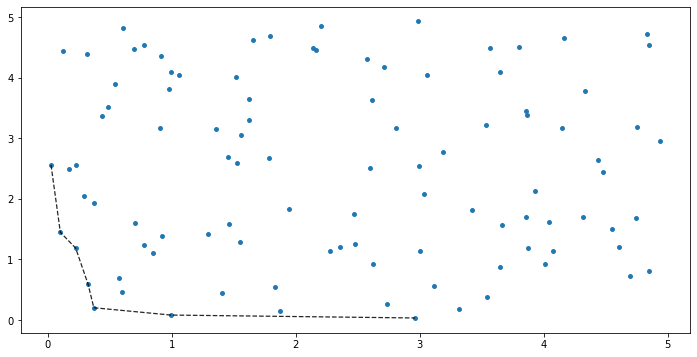

In [4]:
# Modify the figure size for viewing
plt.rcParams['figure.figsize'] = (12,6)

# Run the test.
pareto_efficiency = find_pareto_efficiency(df)
print(pareto_efficiency)
plot_pareto_efficiency(df)
